# Orders Data Analysis

**Notebook Objective**

In this notebook we'll take a closer look at the **Orders** data from Brazilian e-commerce platform **Olist**. In the first few sections we'll do some exploratory data analysis by inspecting the features, examining their distributions, and looking for any correlations. Then, in the final three sections we'll apply various regression models to further understand the relationship between the **review score** and all other features.

***Exploratory Data Analysis***
1. Inspect Features 
2. Distributions
3. Correlations

***Models***

4. Univariate Linear Regression
5. Multivariate Linear Regression
6. Logistic Regression


In [1]:
# Import relevant libraries and modules
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
import math

from olist.data import Olist
from olist.order import Order

## Inspect Features

Let's first load our data and then take a preliminary look at column names, data types, summary stats, and any null values. 

In [2]:
# Load and inspect Orders data
orders = Order().get_training_data()
orders.head()

,order_id,wait_time,expected_wait_time,delay_vs_expected,order_status,dim_is_five_star,dim_is_one_star,review_score,number_of_products,number_of_sellers,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,8.436574,15.544063,0.0,delivered,0,0,4,1,1,29.99,8.72
1,53cdb2fc8bc7dce0b6741e2150273451,13.782037,19.137766,0.0,delivered,0,0,4,1,1,118.70,22.76
2,47770eb9100c2d0c44946d9cf07ec65d,9.394213,26.639711,0.0,delivered,1,0,5,1,1,159.90,19.22
3,949d5b44dbf5de918fe9c16f97b45f8a,13.208750,26.188819,0.0,delivered,1,0,5,1,1,45.00,27.20
4,ad21c59c0840e6cb83a9ceb5573f8159,2.873877,12.112049,0.0,delivered,1,0,5,1,1,19.90,8.72


In [3]:
# Get summary stats
orders.describe()

,wait_time,expected_wait_time,delay_vs_expected,dim_is_five_star,dim_is_one_star,review_score,number_of_products,number_of_sellers,price,freight_value
count,97007.000000,97007.000000,97007.000000,97007.000000,97007.000000,97007.000000,97007.000000,97007.000000,97007.000000,97007.000000
mean,12.564574,23.747123,0.774420,0.589061,0.100539,4.142237,1.142598,1.013968,136.895781,22.780658
std,9.542359,8.762100,4.747827,0.492007,0.300719,1.296559,0.540014,0.123772,208.701803,21.532648
min,0.533414,2.008009,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.850000,0.000000
25%,6.771296,18.337187,0.000000,0.000000,0.000000,4.000000,1.000000,1.000000,45.900000,13.850000
50%,10.225243,23.235741,0.000000,1.000000,0.000000,5.000000,1.000000,1.000000,86.000000,17.170000
75%,15.732506,28.416094,0.000000,1.000000,0.000000,5.000000,1.000000,1.000000,149.900000,24.020000
max,209.628611,155.135463,188.975081,1.000000,1.000000,5.000000,21.000000,5.000000,13440.000000,1794.960000


In [4]:
# Inspect data types and check for null values
orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97007 entries, 0 to 97014
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   order_id            97007 non-null  object 
 1   wait_time           97007 non-null  float64
 2   expected_wait_time  97007 non-null  float64
 3   delay_vs_expected   97007 non-null  float64
 4   order_status        97007 non-null  object 
 5   dim_is_five_star    97007 non-null  int64  
 6   dim_is_one_star     97007 non-null  int64  
 7   review_score        97007 non-null  int64  
 8   number_of_products  97007 non-null  int64  
 9   number_of_sellers   97007 non-null  int64  
 10  price               97007 non-null  float64
 11  freight_value       97007 non-null  float64
dtypes: float64(5), int64(5), object(2)
memory usage: 9.6+ MB


## Distributions

Let's now analyze features from the **Orders** data by understanding their distributions. We'll examine them in smaller groups:
- `wait_time`, `expected_wait_time`, and `delay_vs_expected`
- `dim_is_five_star`, `dim_is_one_star`, and `review_score`
- `number_of_products`, `number_of_sellers`, `price`, and `freight_value`

### Distributions for `wait_time`, `expected_wait_time`, and `delay_vs_expected`

This first grouping of features relate to time and delivery expectations for each order.

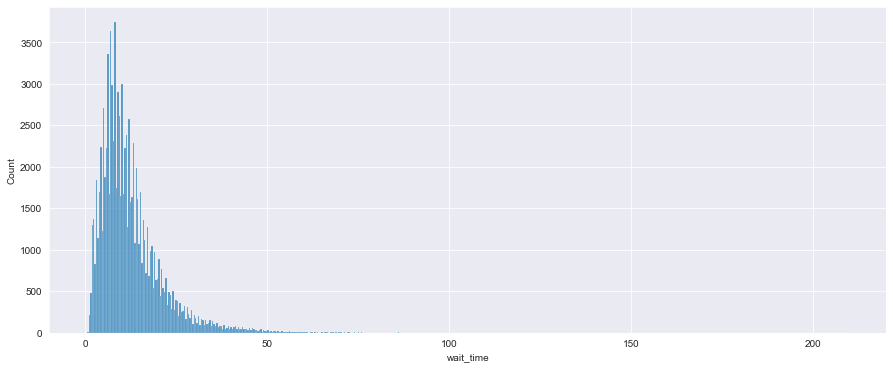

In [5]:
# 'wait_time' histogram
sns.set_style('darkgrid')
plt.figure(figsize=(15,6))
sns.histplot(orders.wait_time);

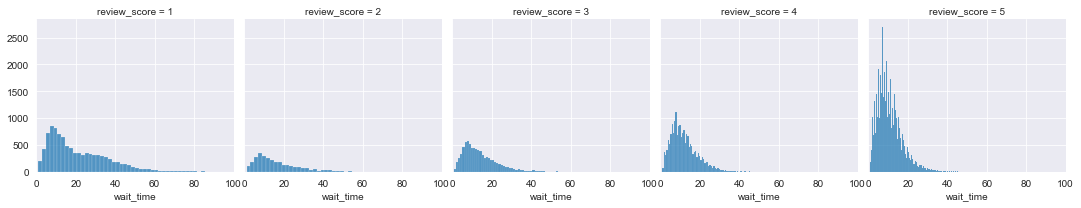

In [6]:
# Distribution of 'wait_time' by review_score
g = sns.FacetGrid(data=orders, col='review_score')
g.map(sns.histplot, 'wait_time')
g.set(xlim=(0,100))
plt.show();

If we look at the change in shape of the `wait_time` distribution across the various review scores, we can see that the **lower** the score, the **flatter and more right-skewed** the shape becomes. This suggests that lower scores are more likely to be associated with a longer `wait_time` for their order deliveries. 

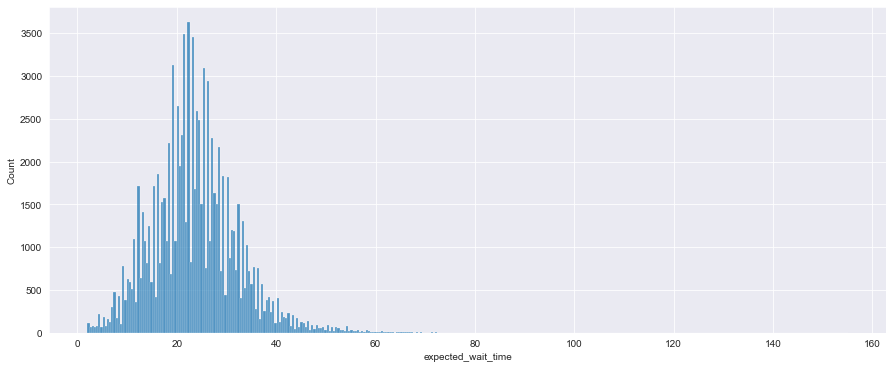

In [7]:
# 'expected_wait_time' histogram
plt.figure(figsize=(15,6))
sns.histplot(orders.expected_wait_time);

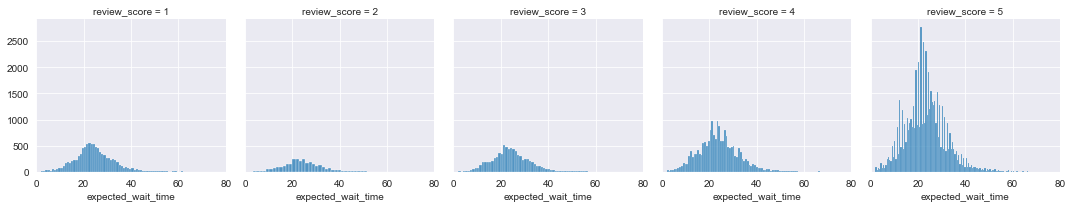

In [8]:
# Distribution of 'expected_wait_time' by review_score
g1 = sns.FacetGrid(data=orders, col='review_score')
g1.set(xlim=(0,80))
g1.map(sns.histplot, 'expected_wait_time');

With `expected_wait_time`, which represents the estimated order processing and delivery time told to a customer, we see a roughly symmetrical distribution with average time of ~23 days across all review scores. While we clearly see higher peaks with the higher review scores of 4 and 5, the heights of the peaks for the lower scores are less pronounced. We'll check later in our analysis if differences in peaks are just a reflection of the underlying distribution of `review_score` in the data (and not necessarily associated with `expected_wait_time`).  



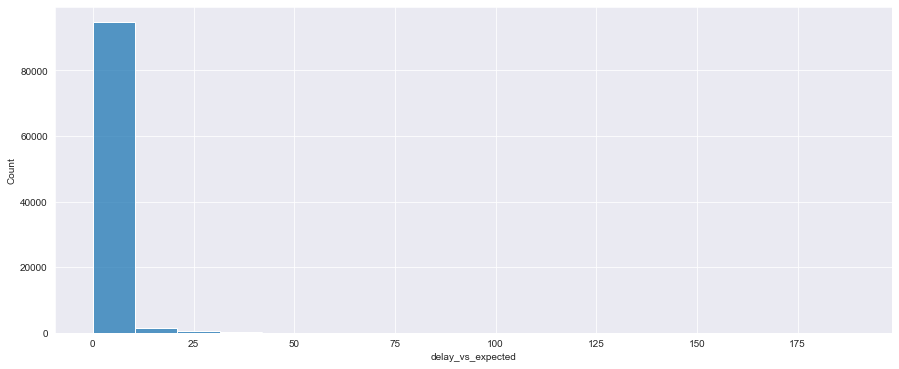

In [44]:
# 'delay_vs_expected' histogram
plt.figure(figsize=(15,6))
sns.histplot(orders.delay_vs_expected);

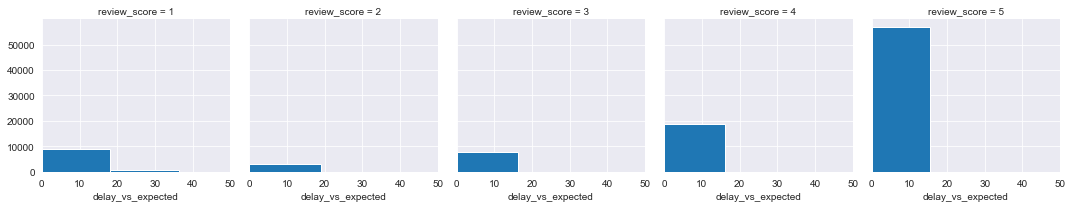

In [45]:
g2 = sns.FacetGrid(data=orders, col='review_score')
g2.set(xlim=(0,50))
g2.map(plt.hist, 'delay_vs_expected');

From our charts, it looks like *delayed orders* make up only a tiny fraction of all orders. And, among those *delayed orders*, we see a larger share with a **`review_score` = 1**. Let's check the numbers more precisely.

In [11]:
# Number of delayed orders
orders[orders.delay_vs_expected > 0].shape[0]

7865

In [12]:
# Number of delayed orders and receiving review score of 1
orders[(orders.delay_vs_expected > 0) & (orders.review_score == 1)].shape[0] 

3671

Out of **97,000** orders, only about **8%** are delayed, and of those that do get delayed, **about half** receive **`review_score` = 1**.

### Distributions for `review_score`, `dim_is_one_star` , and `dim_is_five_star`

This grouping represents the target variables in our analysis. The variables `dim_is_one_star` and `dim_is_five_star` are one-hot encodings for a `review_score` with *one star* and *five stars*, respectively.

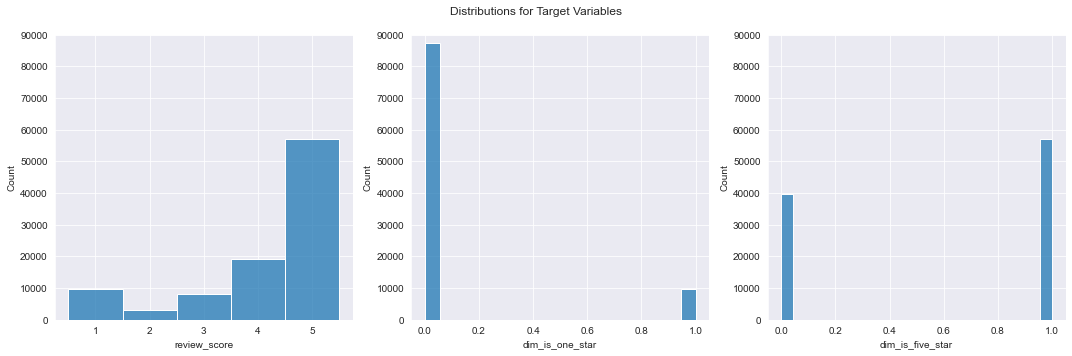

In [53]:
# Histograms of 'review_score', 'dim_is_one_star', and 'dim_is_five_star' 
fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(15,5))
fig.suptitle('Distributions for Target Variables')

ax1 = sns.histplot(orders.review_score, discrete=True, ax=ax1)
ax1.set_ylim(0, 90000);

ax2 = sns.histplot(orders.dim_is_one_star, ax=ax2);
ax2.set_ylim(0, 90000);

ax3 = sns.histplot(orders.dim_is_five_star, ax=ax3)
ax3.set_ylim(0, 90000);

plt.tight_layout();

With this distribution of `review_score`, we can see a similar pattern that was reflected in the peak heights of the the first grouping of features `wait_time`, `expected_wait_time`, and `delay_vs_expected`. Namely, the lowest point is at score 2, followed by similar heights for 1 and 3, followed by a higher level for score 4, and then finally a significantly higher level for score 5. 

This reflects a **J-shaped distribution** which is a common phenomenon among online reviews. Possible explanations for this include:

- **under-reporting bias** - customers who have no strong views either way are less likely to respond, leaving a dip in the area of 'average' ratings.
- **purchasing bias** - customers who have already purchased the product are already positively predisposed, leading to a disproportionate number of positive ratings.
- **social influence bias** - customers can be influenced by existing reviews they've seen, magnifying the effect of over-reporting highly positive or highly critical ratings.

Having this J-shaped distribution would suggest that for the features `expected_wait_time` and `delay_vs_expected`, the differences in peak height can be primarily attributed to the distribution of `review_score` in the dataset. However, with the `wait_time` feature, the *additional differences in skewness* suggest that there is a an additional relationship with the target variable `review_score` that is not fully explained by the underlying distribution.

### Distributions for `number_of_products`, `number_of_sellers`, `price`, and `freight_value`

This grouping of features focus more on the characteristics of the order itself. 

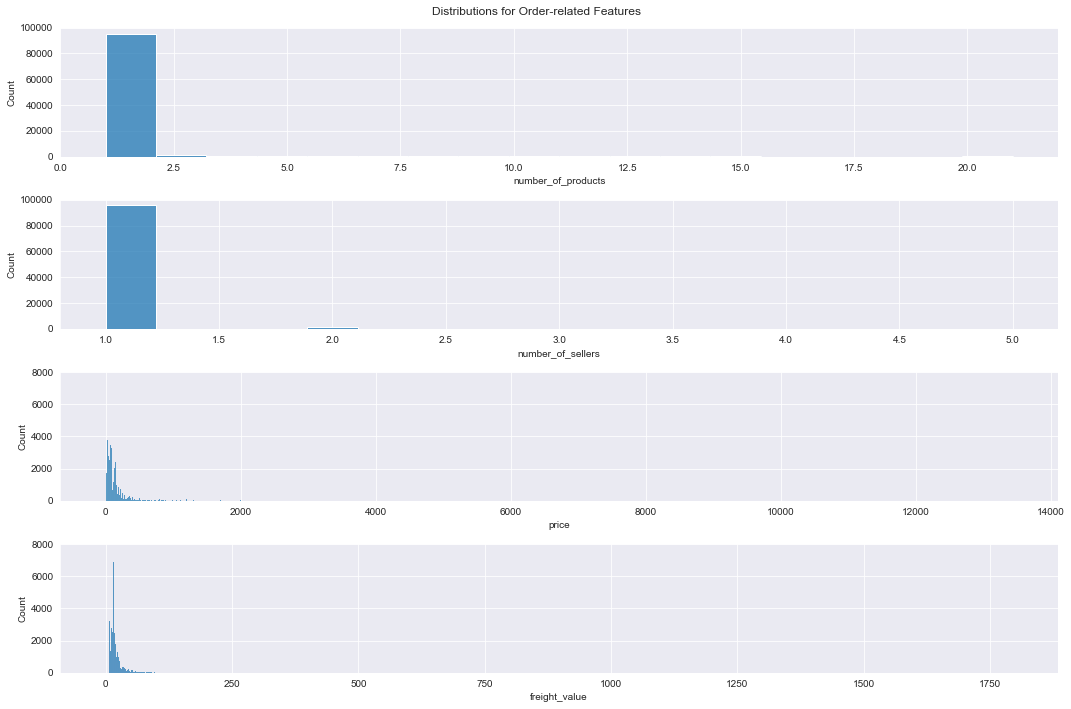

In [55]:
# Histograms for 'number_of_products','number_of_sellers','price', and 'freight_value'
fig, (ax1,ax2, ax3, ax4) = plt.subplots(4,1, figsize=(15, 10))
fig.suptitle('Distributions for Order-related Features')

ax1 = sns.histplot(orders.number_of_products, ax=ax1)
ax1.set_ylim(0,100000);

ax2 = sns.histplot(orders.number_of_sellers, ax=ax2)
ax2.set_ylim(0,100000);

ax3 = sns.histplot(orders.price, ax=ax3);
ax3.set_ylim(0,8000);

ax4 = sns.histplot(orders.freight_value, ax=ax4);
ax4.set_ylim(0,8000);

fig.tight_layout()

From these histograms it's clear that there are some pretty large outliers making these plots difficult to read. 

Let's look at the statistical summary to get a more precise picture.

In [15]:
orders[['number_of_products', 'number_of_sellers', 'price', 'freight_value']].describe()

,number_of_products,number_of_sellers,price,freight_value
count,97007.000000,97007.000000,97007.000000,97007.000000
mean,1.142598,1.013968,136.895781,22.780658
std,0.540014,0.123772,208.701803,21.532648
min,1.000000,1.000000,0.850000,0.000000
25%,1.000000,1.000000,45.900000,13.850000
50%,1.000000,1.000000,86.000000,17.170000
75%,1.000000,1.000000,149.900000,24.020000
max,21.000000,5.000000,13440.000000,1794.960000


With the stats panel and plots, it's clear that few orders contain more than one product or seller. 

And, if we look at the middle 50% of all orders, the order value is in the range of **45-150 BRL** (10-30 USD), and shipping costs fall in the range of **14-24 BRL** (3-5 USD). 

Evidently, most orders are relatively small in both *order size* and *value*.  

## Correlations

Let's look to see if there are correlations between features in the **Orders** dataset.

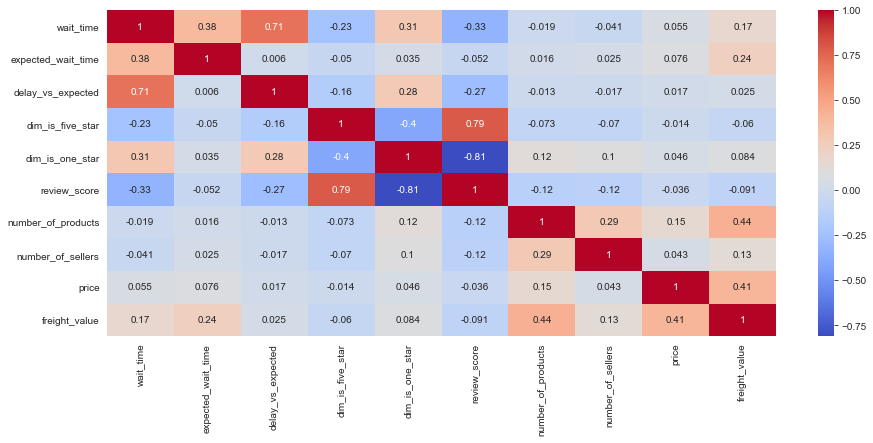

In [16]:
# Use heatmap to under correlations between features and with target variables
plt.figure(figsize=(15,6))
sns.heatmap(orders.corr(), cmap='coolwarm', annot=True);

In [60]:
# Isolated view of correlation coefficients with target variable `review_score`
orders.corr()['review_score'].sort_values(ascending=False)

review_score          1.000000
dim_is_five_star      0.792079
price                -0.036006
expected_wait_time   -0.052191
freight_value        -0.091023
number_of_sellers    -0.116317
number_of_products   -0.124405
delay_vs_expected    -0.271885
wait_time            -0.334806
dim_is_one_star      -0.810262
Name: review_score, dtype: float64

Among features `wait_time` and `delay_vs_expected` appear to have the strongest correlation with the target variable `review_score`. However, we also see that both features (`wait_time` and `delay_vs_expected`) are highly correlated with each other (r=0.71), which makes sense since they both capture components of delivery time for an order. 

Since features that are highly correlated may lead to unreliable coefficients and p-values in a regression model, we may need to drop one of these features later.  

## Univariate Regression

Based on our inspection of correlation coefficients, we see that the features `wait_time` (r=0.33) and `delay_vs_expected` (r=0.27) have a stronger correlation with `review_score` than other features, so let's first look at them individually by running simple univariate regressions.

### Simple regression of `review_score` against `wait_time`

In [18]:
formula = 'review_score ~ wait_time'
model1 = smf.ols(formula=formula, data=orders).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           review_score   R-squared:                       0.112
Model:                            OLS   Adj. R-squared:                  0.112
Method:                 Least Squares   F-statistic:                 1.225e+04
Date:                Sat, 04 Sep 2021   Prob (F-statistic):               0.00
Time:                        15:48:35   Log-Likelihood:            -1.5707e+05
No. Observations:               97007   AIC:                         3.142e+05
Df Residuals:                   97005   BIC:                         3.142e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.7138      0.006    726.803      0.000       4.701       4.727
wait_time     -0.0455      0.000   -110.664      0.000      -0.046      -0.045
==============================================================================
Omnibus:                    19241.637   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            34157.401
Skew:                          -1.282   Prob(JB):                         0.00
Kurtosis:                       4.371   Cond. No.                         26.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Interpretation of Results**

For every additional day of `wait_time`, we can say with a 95% confidence level that the `review_score` is **lower by 4.6%** on average (slope = -0.046). This suggests that there is an association between a longer `wait_time` and a lower `review_score`. 

- With a **p-value** close to zero, our coefficient for `wait_time` is **statistically significant**. 
- The **R-squared** indicates that **11% of the variance** found in the `review_score` is attributable to `wait_time`.
- Since within the **95% confidence interval** the slope does not contain the value zero, we can accept the **coefficient as reliable**.

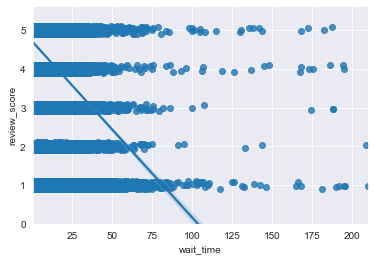

In [19]:
# Plot the univariate regression of 'review_score' on 'wait_time'
sns.regplot(x=orders.wait_time, y=orders.review_score, y_jitter=0.1)
plt.ylim(bottom=0);

### Simple regression of `review_score` against `delay_vs_expected`

In [20]:
formula = 'review_score ~ delay_vs_expected'
model2 = smf.ols(formula=formula, data=orders).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           review_score   R-squared:                       0.074
Model:                            OLS   Adj. R-squared:                  0.074
Method:                 Least Squares   F-statistic:                     7743.
Date:                Sat, 04 Sep 2021   Prob (F-statistic):               0.00
Time:                        15:48:41   Log-Likelihood:            -1.5912e+05
No. Observations:               97007   AIC:                         3.182e+05
Df Residuals:                   97005   BIC:                         3.183e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             4.1997      0.004   1034.674      0.000       4.192       4.208
delay_vs_expected    -0.0742      0.001    -87.995      0.000      -0.076      -0.073
==============================================================================
Omnibus:                    20264.119   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            46233.422
Skew:                          -1.191   Prob(JB):                         0.00
Kurtosis:                       5.401   Cond. No.                         4.88
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Interpretation of Results**

For each additional day of **delay** that the customer waits **beyond the expected delivery date**, we can say with a 95% confidence level that the `review_score` is **lower by 7.4%** on average (slope = -0.074). This suggests that there is an association between delays in delivery and a lower `review_score`.   

- With a **p-value** close to zero, the coefficient for `delay_vs_expected` is **statistically significant**.
- The **R-squared** indicates that **7% of the variance** found in the `review_score` is attributable to `delay_vs_expected`.
- Since within the **95% confidence interval** the slope does not contain the value zero, we can accept the **coefficient as reliable**.

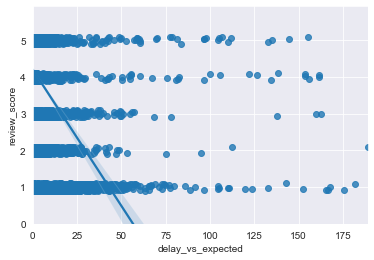

In [61]:
# Plot the univariate regression of 'review_score' on 'delay_vs_expected'
sns.regplot(x=orders.delay_vs_expected, y=orders.review_score, y_jitter=0.1)
plt.ylim(bottom=0);

## Multivariate Regression

While the features `wait_time` and `delay_vs_expected` had higher correlations with our target variable `review_score` compared to the other features in our data, both features (`wait_time` and `delay_vs_expected`) are also highly correlated with each other (r=0.71).

Since features that are highly correlated with each may be concealing a confounding variable and provide us with unreliable coefficients.

### Multivariate Regression with 2 features: `wait_time` and `delay_vs_expected`
First, we'll regress `review_score` on just the two features `wait_time` and `delay_vs_expected`.

In [23]:
model3 = smf.ols('review_score ~ wait_time + delay_vs_expected', data=orders).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           review_score   R-squared:                       0.115
Model:                            OLS   Adj. R-squared:                  0.115
Method:                 Least Squares   F-statistic:                     6275.
Date:                Sat, 04 Sep 2021   Prob (F-statistic):               0.00
Time:                        15:48:48   Log-Likelihood:            -1.5694e+05
No. Observations:               97007   AIC:                         3.139e+05
Df Residuals:                   97004   BIC:                         3.139e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             4.6440      0.008    599.083      0.000       4.629       4.659
wait_time            -0.0388      0.001    -66.715      0.000      -0.040      -0.038
delay_vs_expected    -0.0191      0.001    -16.399      0.000      -0.021      -0.017
==============================================================================
Omnibus:                    19637.196   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            38268.583
Skew:                          -1.235   Prob(JB):                         0.00
Kurtosis:                       4.834   Cond. No.                         31.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Interpretation of Results**

While holding `delay_vs_expected` constant, each additional day of **`wait_time`** reduces the `review_score` by **3.9%** on average (slope = -0.0388). 

While holding `wait_time` constant, each additional day of **`delay_vs_expected`** reduces the `review_score` by **1.9%** on average (slope = -0.0191).

Therefore, in contrast to our *univariate analysis*, which suggested **`delay_vs_expected`** (**-7.4%**) has a stronger association with a low `review_score` than **`wait_time`** (**-4.6%**), we find the opposite to be the case in our multivariate analysis.

With a *multivariate regression model* that considers both features, the **`wait_time`** (**-3.9%**) has a stronger association with a low `review_score` than **`delay_vs_expected`** (**-1.9%**).

- Both features show **p-values** close to zero indicating that they are **statistically significant**
- Within the **95% confidence interval**, slopes for the **partial coefficients** do not contain zero which allows us to consider them **reliable**
- **R-squared** is relatively low: only **11.5%** of the variation in `review_score` is explained by the variation of `wait_time` and `delay_vs_expected`

Just with these findings, we could make the case that for the customer the ***total wait time*** (from placing the order online to getting the package at the front door) has more impact on the ***review score*** than an order that ***arrives past the estimated delivery date***. 

However, 



### Multivariate Regression with multiple features

Since the **R-squared** in our previous model with only two features was relatively low, in our next model we'll add other features from our data to build a more complete picture of what factors impact the `review_score`. 

In [24]:
# Features to include in the model
features = [
    "wait_time",
    "delay_vs_expected",
    "number_of_products",
    "number_of_sellers",
    "price",
    "freight_value"]

Because these features are in different units, we'll standardize them first before putting them into our regression model. 

In [25]:
# Standardize features by calculating respective z-scores:   Z = (X - mu) / sigma

orders_standardized = orders.copy()
for f in features:
    mu = orders[f].mean()
    sigma = orders[f].std()
    orders_standardized[f] = orders[f].map(lambda x: (x - mu) / sigma)

orders_standardized.head()

,order_id,wait_time,expected_wait_time,delay_vs_expected,order_status,dim_is_five_star,dim_is_one_star,review_score,number_of_products,number_of_sellers,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,-0.432597,15.544063,-0.16311,delivered,0,0,4,-0.264063,-0.112854,-0.512242,-0.652992
1,53cdb2fc8bc7dce0b6741e2150273451,0.127585,19.137766,-0.16311,delivered,0,0,4,-0.264063,-0.112854,-0.087186,-0.000959
2,47770eb9100c2d0c44946d9cf07ec65d,-0.332241,26.639711,-0.16311,delivered,1,0,5,-0.264063,-0.112854,0.110225,-0.165361
3,949d5b44dbf5de918fe9c16f97b45f8a,0.067507,26.188819,-0.16311,delivered,1,0,5,-0.264063,-0.112854,-0.440321,0.205239
4,ad21c59c0840e6cb83a9ceb5573f8159,-1.015545,12.112049,-0.16311,delivered,1,0,5,-0.264063,-0.112854,-0.560588,-0.652992


In [26]:
# Model4; create formula for stats.model

formula = 'review_score ~ ' + ' + ' .join(features)
formula

'review_score ~ wait_time + delay_vs_expected + number_of_products + number_of_sellers + price + freight_value'

In [27]:
model4 = smf.ols(formula = formula, data = orders_standardized).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           review_score   R-squared:                       0.141
Model:                            OLS   Adj. R-squared:                  0.141
Method:                 Least Squares   F-statistic:                     2661.
Date:                Sat, 04 Sep 2021   Prob (F-statistic):               0.00
Time:                        15:48:49   Log-Likelihood:            -1.5545e+05
No. Observations:               97007   AIC:                         3.109e+05
Df Residuals:                   97000   BIC:                         3.110e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              4.1422      0.004   1073.800      0.000       4.135       4.150
wait_time             -0.3898      0.006    -69.175      0.000      -0.401      -0.379
delay_vs_expected     -0.0816      0.006    -14.772      0.000      -0.092      -0.071
number_of_products    -0.1465      0.004    -32.751      0.000      -0.155      -0.138
number_of_sellers     -0.1305      0.004    -32.377      0.000      -0.138      -0.123
price                 -0.0099      0.004     -2.339      0.019      -0.018      -0.002
freight_value          0.0350      0.005      7.301      0.000       0.026       0.044
==============================================================================
Omnibus:                    18510.939   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            36369.606
Skew:                          -1.162   Prob(JB):                         0.00
Kurtosis:                       4.897   Cond. No.                         2.63
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

To more easily compare the various partial coefficents of the features, we'll plot them on a bar chart.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           review_score   R-squared:                       0.139
Model:                            OLS   Adj. R-squared:                  0.139
Method:                 Least Squares   F-statistic:                     3143.
Date:                Sat, 04 Sep 2021   Prob (F-statistic):               0.00
Time:                        18:53:26   Log-Likelihood:            -1.5556e+05
No. Observations:               97007   AIC:                         3.111e+05
Df Residuals:                   97001   BIC:                         3.112e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              4.1422      0.004   1072.600      0.000       4.135       4.150
wait_time             -0.4494      0.004   -113.986      0.000      -0.457      -0.442
number_of_products    -0.1506      0.004    -33.705      0.000      -0.159      -0.142
number_of_sellers     -0.1317      0.004    -32.642      0.000      -0.140      -0.124
price                 -0.0117      0.004     -2.756      0.006      -0.020      -0.003
freight_value          0.0457      0.005      9.619      0.000       0.036       0.055
==============================================================================
Omnibus:                    18117.182   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            31951.209
Skew:                          -1.207   Prob(JB):                         0.00
Kurtosis:                       4.442   Cond. No.                         2.02
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

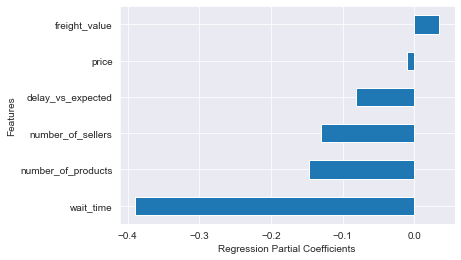

In [28]:
# Regression Partial Coefficients Bar Chart
model4.params[1:].sort_values().plot(kind='barh')
plt.xlabel('Regression Partial Coefficients')
plt.ylabel('Features');

**Interpretation of Results**

With our new regression model which includes other features from our dataset, the **`wait_time`** variable (slope = -0.3898) has the most explanatory power for `review_score` relative to the other features. In this model, we see that the difference in influence has widened with `delay_vs_expected` (slope = -0.0816).

Additionally, with this new model, we can see that an increase in `number_of_sellers` (slope = -0.13) and `number_of_products` (slope = -0.15) per order leads to a decrease in `review_score`.

- The **R-squared** for this new model has not increased much and still only explains about 14.1% of the variance in the `review_score`. This points to most factors impacting the review score lying outside of the orders dataset.
- The **p-values** for our partial coefficients are mostly close to zero. However, the **coefficient** for `price` is **small relative to its standard error**, and the **95% confidence interval** is **close to containing the value of zero, which would make the coefficient less reliable**.   
- The overall model is **statistically significant** as its **F-statistic is much greater than 1** (and a F-proba close to zero)

 ### Residuals

Besides evaluating the statistical significance of our features and the R-squared of our model, we can evaluate the performance of our regression model by looking at the **residuals** (predicted values - real values). More specifically, we can calculate the **Root Mean Square Error (RMSE)** as a gauge for how much on average our regression model is predicting scores differing from the real scores.     

In [29]:
# Calculate residuals (predicted values - real values)
predicted_review_score = model4.predict(orders_standardized[features])
residuals = predicted_review_score - orders_standardized.review_score
residuals.head()

0    0.359790
1    0.160051
2   -0.668416
3   -0.805804
4   -0.412485
dtype: float64

In [30]:
# Calculate the RMSE 
RMSE = (residuals.map(lambda x: x**2).sum() / len(residuals))**0.5
RMSE

1.2014273689617105

The **RMSE** tells us that on average our predicted scores are **1.2** stars off of the real scores. On a 5-star rating system, that's not great, but it's not horrible either. 

REMOVE ASSUMPTIONS SECTION FOR RESIDUALS


We should also make sure that the residuals are:
 - not correlated with one another (autocorrelation)
 - normally distributed 
 - constant variance (i.e. not exhibiting heteroscedasticity)

**Check the Durbin-Watson test for autocorrelation**

With a scale of 0-4 (with 0 indicating positively autocorrelated, and 4 indicating negatively autocorrelated), our **Durbin-Watson** statistic of **2.009** allows to say that there is **little autocorrelation** among the residuals. Autocorrelation among residuals would imply that our confidence intervals are narrower and p-values lower than they ought to be, allowing us to be more confident than we should be with our findings.

**Check the Jarque-Bera test for normality & plot the distribution**

The **Jarque-Bera** statistic (normal=0) measures skewness and kurtosis to assess normality. A large value like **36369.606** indicates
that the distribution is not normal. With a p-value close to zero, this is statistically significant.


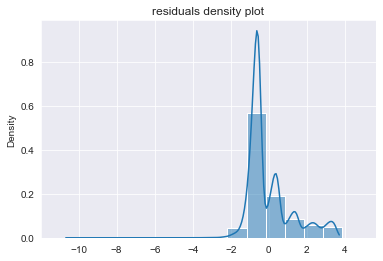

In [31]:
# Let's confirm this with a density plot of the residuals
sns.histplot(residuals, kde=True, stat='density', discrete=True)
plt.title('residuals density plot');

As we can see the numerous humps in the plot, this distribution does not look normal....

Our earlier findings of the j-shaped distribution for `review_score` support this.

**Check the variance of the residuals for heteroskedasticity**

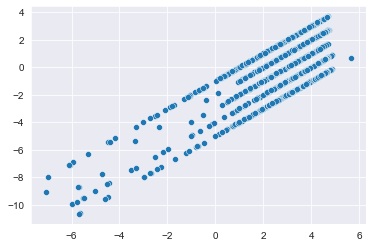

In [32]:
# Let's check the variance by plotting the residuals against the fitted values
sns.scatterplot(y=residuals, x=predicted_review_score);

In [33]:
from statsmodels.stats.diagnostic import het_breuschpagan as bp

bp_results = bp(residuals, exog_het=orders_standardized[features])
bp_results

(10735.405150798748, 0.0, 2011.757243414151, 0.0)

**Conclusion**

We can start to see that a linear regression model is failing along some basic assumptions (e.g. normality of residuals) and poor performance (e.g. R-squared is low). Since our review score (five-star rating system) is a categorical variable, we'll now look at applying a logistic regression model

## Logistic Regression

Since with voluntary online reviews there is a bias for response by those who have a strong reponse (positive or negative) to a product, and we already saw a j-shaped distribution among our `review_score` variable, let's try a different approach.

Rather than use a linear regression model to predict the full range of `review_score`, we'll instead use a logistic regression model to focus on what features lead to getting the worst score (`dim_is_one_star`), and also a separate logistic regression for getting the best score (`dim_is_five_star`). 

Let's stick with the same features from our multivariate regression that had statistically significant partial coefficients.

In [34]:
features = ['wait_time', 'delay_vs_expected', 'number_of_products', 'number_of_sellers', 'price', 'freight_value']

To make sure we have an acceptable degree of collinearity among these features (VIF < 10), let's also first look at the **variance inflation factor (VIF)**.

$ VIF = \frac {1}{1 - R^2} $

In [35]:
# Check for multi-colinearity by looking at variance inflation factor (VIF)
X = orders[features]
X.head()

,wait_time,delay_vs_expected,number_of_products,number_of_sellers,price,freight_value
0,8.436574,0.0,1,1,29.99,8.72
1,13.782037,0.0,1,1,118.70,22.76
2,9.394213,0.0,1,1,159.90,19.22
3,13.208750,0.0,1,1,45.00,27.20
4,2.873877,0.0,1,1,19.90,8.72


In [36]:
df = pd.DataFrame()
df['VIF'] = [vif(X.values, i) for i in range(X.shape[1])]
df['Features'] = X.columns
df

,VIF,Features
0,5.482640,wait_time
1,2.057560,delay_vs_expected
2,7.363534,number_of_products
3,8.910229,number_of_sellers
4,1.721790,price
5,3.265091,freight_value


In [62]:
features1 = ['wait_time', 'number_of_products', 'number_of_sellers', 'price', 'freight_value']
features2 = ['delay_vs_expected', 'number_of_products', 'number_of_sellers', 'price', 'freight_value']
X = orders[features1]
X.head()

df = pd.DataFrame()
df['VIF'] = [vif(X.values, i) for i in range(X.shape[1])]
df['Features'] = X.columns
df

,VIF,Features
0,2.736272,wait_time
1,7.333976,number_of_products
2,7.780291,number_of_sellers
3,1.721004,price
4,3.199177,freight_value


In [63]:
X = orders[features2]
X.head()

df = pd.DataFrame()
df['VIF'] = [vif(X.values, i) for i in range(X.shape[1])]
df['Features'] = X.columns
df

,VIF,Features
0,1.026886,delay_vs_expected
1,7.270452,number_of_products
2,6.102003,number_of_sellers
3,1.720942,price
4,3.094711,freight_value


Since selected features all are still below a **VIF** of 10, we'll keep them for our logistic regression models.

In [37]:
# Fit logit model for 1-star reviews
logit_one = smf.logit(formula='dim_is_one_star ~' + ' + '.join(features), data=orders).fit()
logit_one.summary()

Optimization terminated successfully.
         Current function value: 0.280352
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:        dim_is_one_star   No. Observations:                97007
Model:                          Logit   Df Residuals:                    97000
Method:                           MLE   Df Model:                            6
Date:                Sat, 04 Sep 2021   Pseudo R-squ.:                  0.1407
Time:                        15:48:51   Log-Likelihood:                -27196.
converged:                       True   LL-Null:                       -31650.
Covariance Type:            nonrobust   LLR p-value:                     0.000
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -5.2641      0.069    -75.777      0.000      -5.400      -5.128
wait_time              0.0648      0.002     40.920      0.000       0.062       0.068
delay_vs_expected      0.0667      0.004     17.660      0.000       0.059       0.074
number_of_products     0.5074      0.020     25.910      0.000       0.469       0.546
number_of_sellers      1.4113      0.063     22.524      0.000       1.289       1.534
price                  0.0003   5.29e-05      5.684      0.000       0.000       0.000
freight_value         -0.0033      0.001     -5.308      0.000      -0.005      -0.002
======================================================================================
"""

In order to interpret our coefficients from our logistic regression, we'll first need to convert them from log-odds (logits) to odds. 

In [38]:
# Log-odds to odds conversion by exponentiating
logit_one_results = pd.DataFrame(logit_one.params, columns=['log-odds'])
logit_one_results['odds'] = logit_one_results['log-odds'].apply(lambda x: math.exp(x))
logit_one_results

,log-odds,odds
Intercept,-5.264097,0.005174
wait_time,0.064804,1.066949
delay_vs_expected,0.066703,1.068978
number_of_products,0.507396,1.660960
number_of_sellers,1.411319,4.101362
price,0.000300,1.000300
freight_value,-0.003333,0.996673


After conversion to odds, we should now be able to interpret the coefficient for each feature as the change in odds for every additional unit of that feature. Note that when interpreting odds, **1.0** is in the middle of the scale, with values greater than 1 representing an increase in odds, and values less than 1 representing a decrease in odds. Values at 1.0 are also said to be 50/50 chance or 1:1 odds (i.e., effectively, no impact on the outcome).     

Given our logistic regression, we can say that holding all other variables constant, *for each additional day of `wait_time`, the odds of getting a 1-star increases on average by* ***6.7%***. The `delay_vs_expected` variable has a similar influence. 

Notably, for *every additional seller included in an order, on average, the odds of getting a 1-star review increases by **310%** on average*! 

We also see a **66%** increase, on average, in odds for getting a 1-star review for each additional product added to an order. However, as mentioned earlier, few orders on the platform contain more than a single seller or product.

`Price` and `freight_value` are so close to 1, that they do not appear to have much influence on getting a 1-star review. 

Let's check out our logit model for 5-star reviews.

In [39]:
# Fit logit model for 5-star reviews
logit_five = smf.logit(formula='dim_is_five_star ~' + ' + '.join(features), data=orders).fit()
logit_five.summary()

Optimization terminated successfully.
         Current function value: 0.638115
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:       dim_is_five_star   No. Observations:                97007
Model:                          Logit   Df Residuals:                    97000
Method:                           MLE   Df Model:                            6
Date:                Sat, 04 Sep 2021   Pseudo R-squ.:                 0.05771
Time:                        15:48:51   Log-Likelihood:                -61902.
converged:                       True   LL-Null:                       -65693.
Covariance Type:            nonrobust   LLR p-value:                     0.000
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              2.4599      0.064     38.448      0.000       2.334       2.585
wait_time             -0.0494      0.001    -45.267      0.000      -0.052      -0.047
delay_vs_expected     -0.1017      0.005    -20.746      0.000      -0.111      -0.092
number_of_products    -0.2839      0.015    -18.383      0.000      -0.314      -0.254
number_of_sellers     -1.1413      0.063    -18.123      0.000      -1.265      -1.018
price                6.46e-05   3.63e-05      1.778      0.075   -6.61e-06       0.000
freight_value          0.0016      0.000      3.878      0.000       0.001       0.002
======================================================================================
"""

In [40]:
# Log-odds to odds conversion by exponentiating
logit_five_results = pd.DataFrame(logit_five.params, columns=['log-odds'])
logit_five_results['odds'] = logit_five_results['log-odds'].apply(lambda x: math.exp(x))
logit_five_results

,log-odds,odds
Intercept,2.459868,11.703267
wait_time,-0.049446,0.951756
delay_vs_expected,-0.101731,0.903273
number_of_products,-0.283877,0.752859
number_of_sellers,-1.141325,0.319396
price,0.000065,1.000065
freight_value,0.001584,1.001585


From these results, we see that the **p-value** for `price` *(p-value = 0.075)* is not below our alpha threshold of 0.05, so we **cannot reject the null hypothesis** that `price` has no influence on a 5-star rating.

The other coefficients however are **statistically significant**. 

Like with our *logit_one_model*, the feature `freight_value` has an odds ratio of **1.0** indicating that an increase of one Brazilian Real (BRL) has **equal odds** of receiving a five-star review or not (i.e., this variable has no effect on the outcome).

With our *logit_five_model*, the change in odds matches the direction that we'd expect. For example, holding all other variables constant, an additional day in `wait_time` on average **decreases by 5%** the odds of receiving a 5-star rating. And, for each additional day of **delay**, we expect on average a **decrease in odds by 10%**.

Similarly, holding all other variables constant, adding one more **product** or **seller** to an order on average **decreases the odds** of getting a 5-star rating by **25%** and **68%**, respectively.

Let's plot the coefficients for each logit model for a side-by-side comparison.

/Users/atat/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


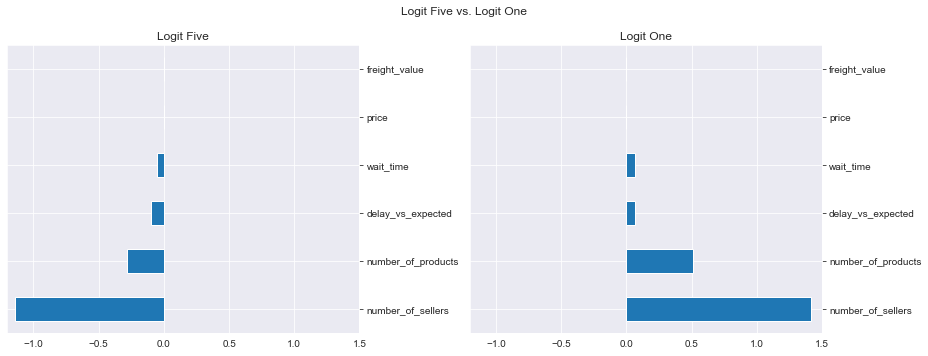

In [41]:
# Logistic Regression Model Comparison
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(13,5))
fig.suptitle('Logit Five vs. Logit One')

# Logistic Regression - logit_five_model
ax1 = plt.subplot(1,2,1)
ax1.set_title('Logit Five')
ax1.yaxis.tick_right()
ax1.set_xlim(-1.2, 1.5)
logit_five.params[1:].sort_values().plot(kind='barh', ax=ax1)

# Logistic Regression - logit_one_model
ax2 = plt.subplot(1,2,2)
ax2.set_title('Logit One')
ax2.yaxis.tick_right()
ax2.set_xlim(-1.2, 1.5)
logit_one.params[1:].sort_values(ascending=False).plot(kind='barh', ax=ax2)

plt.tight_layout()
plt.show();

In terms of feature importance, the two models align similarly. However, for `number_of_sellers`, `number_of_products`, and `wait_time`, it appears that changes in these features have more influence on a 1-star review even than a 5-star review. 

Let's also plot and compare the coefficients between our linear and logistic regression models. While the values of the coefficients are not directly comparable, we can check the relative importance of the features for each model. 

In [42]:
linear_model = smf.ols('review_score ~'+ ' + '.join(features), data=orders).fit()
print(logit_one.summary())
print((('-----'*20) +'\n')*3)
print(linear_model.summary())

                           Logit Regression Results                           
Dep. Variable:        dim_is_one_star   No. Observations:                97007
Model:                          Logit   Df Residuals:                    97000
Method:                           MLE   Df Model:                            6
Date:                Sat, 04 Sep 2021   Pseudo R-squ.:                  0.1407
Time:                        15:48:52   Log-Likelihood:                -27196.
converged:                       True   LL-Null:                       -31650.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -5.2641      0.069    -75.777      0.000      -5.400      -5.128
wait_time              0.0648      0.002     40.920      0.000       0.062       0.068
delay_vs_expected   

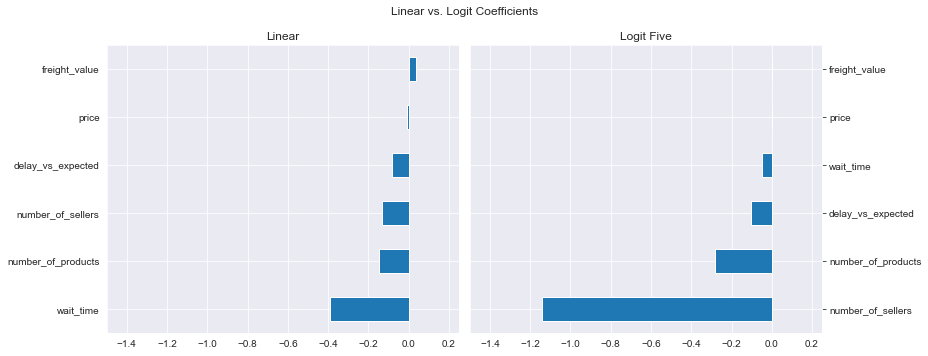

In [43]:
plt.figure(figsize=(13,5))
plt.suptitle('Linear vs. Logit Coefficients')

# Linear Regression - model4
ax1 = plt.subplot(1,2,1)
ax1.set_title('Linear')
ax1.set_xlim(-1.5, 0.25)
model4.params[1:].sort_values().plot(kind='barh', ax=ax1)

# Logistic Regression - logit_five_model
ax2 = plt.subplot(1,2,2)
ax2.set_title('Logit Five')
ax2.yaxis.tick_right()
ax2.set_xlim(-1.5, 0.25)
logit_five.params[1:].sort_values().plot(kind='barh', ax=ax2)

plt.tight_layout()
plt.show()

We do see some similarities in that `price` and `freight_value` appear not to play much of a role on the `review_score`. The other four features do have influence, but they differ slightly in feature importance.   